# Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
%matplotlib inline
import seaborn as sns

import datetime as dt

import missingno as msno # viz missing values

sns.set_style("darkgrid")
import itertools

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Utility Functions and Pipelines

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
def report(true_y, pred_y, class_names):
    
    # Matthews Correlation Coefficient
    Matthews_Coefficient = round(metrics.matthews_corrcoef(true_y, pred_y),2)
    print(f'Matthews Coefficient: {Matthews_Coefficient}') # values over 0.7 are considered good scores

In [ ]:
class_names = ['high', 'low', 'medium']

In [149]:
def fitModel(table, class_name, title): 
    '''This function returns necassary evaluation for a DT model
    parameters: table, class_name, title'''
    
    # print out title
    print(f'{title}')
    print('--------------------------------------')
    
    #read table
    df = table.drop(columns = ['customer_id'], axis=1)
    
    # seperate into datasets
    X = df.drop(columns=['cluster']).copy()
    y = df['cluster']
    
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)
    X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
    
    # check datasets shape
    print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
    print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
    print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')
    print('\n')
    
    # fit a model
    dtclf = DecisionTreeClassifier()
    dtclf.fit(X_train, y_train)
    y_predict = dtclf.predict(X_test)
    
    print(classification_report(y_test, y_predict))
    
    #class_names = ['high', 'low', 'medium']
    
    plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

    report(y_test, y_predict, class_names)
    
    print('\n')
    print('10-fold cross validation')
    
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)

    # evaluate model
    scores = cross_val_score(dtclf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))  

In [150]:
##########################################
table = PastCust_trans_labeled_3
class_names = ['high', 'low', 'medium']
title = 'transaction data (2017 yr)'

fitModel(table, class_names, title)
##########################################

# Read datasets

In [58]:
PastCust_trans_labeled_3 = pd.read_excel('PastCust_trans_labeled_3.xlsx')

In [11]:
PastCust_trans_cut_f3t_labeled_3 = pd.read_excel('PastCust_trans_cut_f3t_labeled_3.xlsx')

In [12]:
PastCust_trans_cut_f3m_labeled_3 = pd.read_excel('PastCust_trans_cut_f3m_labeled_3.xlsx')

In [59]:
PastCust_demo_cat_labeled_3 = pd.read_excel('PastCust_demo_cat_labeled_3.xlsx')

In [61]:
PastCust_demo_labeled_3 = pd.read_excel('PastCust_demo_labeled_3.xlsx')

# Transaction data

In [14]:
PastCust_trans_labeled_3.head()

,customer_id,product_age_new,product_age_old,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,Mountain,...,Standard,Touring,product_class_high,product_class_low,product_class_medium,product_size_large,product_size_medium,product_size_small,multi_trans,cluster
0,1,2,9,4,2,2,2,1,0,1,...,7,0,1,2,8,0,9,2,0,high
1,2,1,2,1,0,0,0,0,2,0,...,3,0,0,0,3,0,3,0,0,low
2,3,4,3,2,2,0,0,3,0,1,...,3,0,1,2,4,3,2,2,0,high
3,4,0,2,1,0,0,1,0,0,0,...,2,0,0,0,2,1,1,0,0,low
4,5,3,3,1,2,0,1,1,1,1,...,2,0,1,2,3,2,2,2,0,medium


## Split data into training, test, and validation sets

In [15]:
df = PastCust_trans_labeled_3.drop(columns = ['customer_id'], axis=1)

In [16]:
X = df.drop(columns=['cluster']).copy()
y = df['cluster']

In [17]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [18]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [19]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2792, 19), the shape of y_train is  (2792,)
the shape of X_valid is (349, 19), the shape of y_valid is  (349,)
the shape of X_test is (349, 19), the shape of y_test is  (349,)


## Fit model

In [20]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.77      0.74      0.76       101
         low       0.33      0.34      0.33        68
      medium       0.65      0.66      0.66       180

    accuracy                           0.62       349
   macro avg       0.59      0.58      0.58       349
weighted avg       0.63      0.62      0.62       349



Classification report: DT
-------------------------------
Matthews Coefficient: 0.38


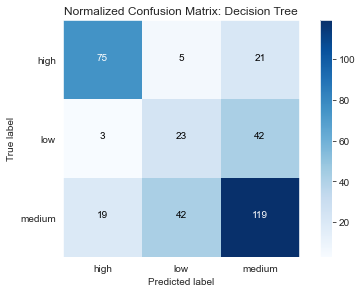

In [22]:
class_names = ['high', 'low', 'medium']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

Feature: 0, Score: 0.03511
Feature: 1, Score: 0.03843
Feature: 2, Score: 0.03492
Feature: 3, Score: 0.03641
Feature: 4, Score: 0.03926
Feature: 5, Score: 0.04440
Feature: 6, Score: 0.03260
Feature: 7, Score: 0.04007
Feature: 8, Score: 0.01128
Feature: 9, Score: 0.05615
Feature: 10, Score: 0.26088
Feature: 11, Score: 0.04302
Feature: 12, Score: 0.04318
Feature: 13, Score: 0.03453
Feature: 14, Score: 0.11854
Feature: 15, Score: 0.04958
Feature: 16, Score: 0.05104
Feature: 17, Score: 0.02841
Feature: 18, Score: 0.00218


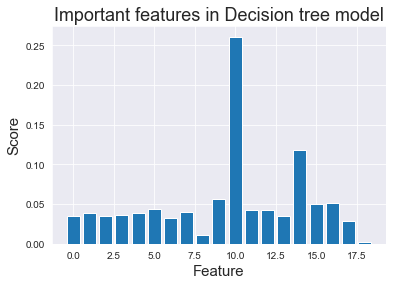

In [23]:
# plotting feature importances
importance = dtclf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.xlabel('Feature', fontsize =15)
plt.ylabel('Score', fontsize =15)
plt.title('Important features in Decision tree model', fontsize =18)
plt.show()

plt.show()

In [24]:
# Here are the top 5 important features
# X.columns[[14,10,13,12,9]]
X.columns[[9,10,14]]

Index(['Road', 'Standard', 'product_class_medium'], dtype='object')

# Transaction data (first three transactions)

## Split data into training, test, and validation sets

In [25]:
df = PastCust_trans_cut_f3t_labeled_3.drop(columns = ['customer_id'], axis=1)

In [26]:
X = df.drop(columns=['cluster']).copy()
y = df['cluster']

In [27]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [28]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [29]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2792, 19), the shape of y_train is  (2792,)
the shape of X_valid is (349, 19), the shape of y_valid is  (349,)
the shape of X_test is (349, 19), the shape of y_test is  (349,)


## Fit model

In [30]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [31]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.35      0.40      0.37       116
         low       0.18      0.21      0.19        53
      medium       0.51      0.44      0.48       180

    accuracy                           0.39       349
   macro avg       0.35      0.35      0.35       349
weighted avg       0.41      0.39      0.40       349



Classification report: DT
-------------------------------
Matthews Coefficient: 0.02


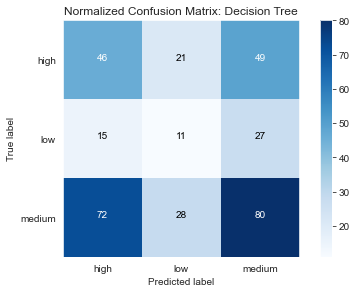

In [32]:
class_names = ['high', 'low', 'medium']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [33]:
confusion_matrix(y_test,y_predict)

array([[46, 21, 49],
       [15, 11, 27],
       [72, 28, 80]])

# Transaction data (first three months)

## Split data into training, test, and validation sets

In [34]:
df = PastCust_trans_cut_f3m_labeled_3.drop(columns = ['customer_id'], axis=1)

In [35]:
X = df.drop(columns=['cluster']).copy()
y = df['cluster']

In [36]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [37]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [38]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2078, 19), the shape of y_train is  (2078,)
the shape of X_valid is (260, 19), the shape of y_valid is  (260,)
the shape of X_test is (260, 19), the shape of y_test is  (260,)


## Fit model

In [39]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.44      0.38      0.41       112
         low       0.18      0.12      0.15        48
      medium       0.41      0.53      0.46       100

    accuracy                           0.39       260
   macro avg       0.34      0.35      0.34       260
weighted avg       0.38      0.39      0.38       260



Classification report: DT
-------------------------------
Matthews Coefficient: 0.03


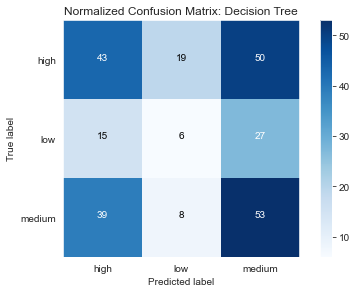

In [42]:
class_names = ['high', 'low', 'medium']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [43]:
confusion_matrix(y_test,y_predict)

array([[43, 19, 50],
       [15,  6, 27],
       [39,  8, 53]])

# Demographic data

In [46]:
PastCust_demo_cat_labeled_3.head()

,customer_id,gender,wealth_segment,owns_car,state,cluster,age_cat,purchase_cat,tenure_cat,property_cat
0,1,Female,Mass Customer,Yes,NSW,high,senior,many,medium,medium
1,2,Male,Mass Customer,Yes,NSW,low,mid-age,many,long,medium
2,4,Male,Mass Customer,No,QLD,low,senior,medium,medium,medium
3,5,Female,Affluent Customer,Yes,NSW,medium,mid-age,medium,medium,low
4,6,Male,High Net Worth,Yes,VIC,medium,senior,medium,medium,medium


In [62]:
PastCust_demo_labeled_3.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation,cluster
0,1,Female,93,Mass Customer,Yes,11,64,NSW,10,high
1,2,Male,81,Mass Customer,Yes,16,37,NSW,10,low
2,4,Male,33,Mass Customer,No,7,56,QLD,9,low
3,5,Female,56,Affluent Customer,Yes,8,40,NSW,4,medium
4,6,Male,35,High Net Worth,Yes,13,51,VIC,9,medium


## Split data into training, test, and validation sets

In [63]:
df = PastCust_demo_labeled_3.drop(columns = ['customer_id'], axis=1)

In [64]:
X = df.drop(columns=['cluster']).copy()

In [65]:
X = pd.get_dummies(X) 

In [66]:
y = df['cluster']

In [67]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [68]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [69]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2726, 14), the shape of y_train is  (2726,)
the shape of X_valid is (341, 14), the shape of y_valid is  (341,)
the shape of X_test is (341, 14), the shape of y_test is  (341,)


## Fit model

In [70]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [71]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.32      0.37      0.34       104
         low       0.11      0.12      0.11        60
      medium       0.52      0.48      0.50       177

    accuracy                           0.38       341
   macro avg       0.32      0.32      0.32       341
weighted avg       0.39      0.38      0.39       341



Classification report: DT
-------------------------------
Matthews Coefficient: -0.0


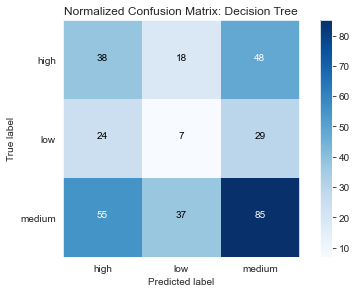

In [72]:
class_names = ['high', 'low', 'medium']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

# Demo + Trans data

## Split data into training, test, and validation sets

In [73]:
df = PastCust_trans_labeled_3.merge(PastCust_demo_labeled_3, 
                                   on = 'customer_id',
                                   how = 'inner')

In [74]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster_x',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation',
       'cluster_y'],
      dtype='object')

In [75]:
df.rename(columns = {'cluster_x':'cluster'}, inplace=True)
df.drop('cluster_y', axis=1, inplace=True)

In [76]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation'],
      dtype='object')

In [77]:
df.head()

,customer_id,product_age_new,product_age_old,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,Mountain,...,multi_trans,cluster,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation
0,1,2,9,4,2,2,2,1,0,1,...,0,high,Female,93,Mass Customer,Yes,11,64,NSW,10
1,2,1,2,1,0,0,0,0,2,0,...,0,low,Male,81,Mass Customer,Yes,16,37,NSW,10
2,4,0,2,1,0,0,1,0,0,0,...,0,low,Male,33,Mass Customer,No,7,56,QLD,9
3,5,3,3,1,2,0,1,1,1,1,...,0,medium,Female,56,Affluent Customer,Yes,8,40,NSW,4
4,6,3,2,2,0,0,0,1,2,0,...,0,medium,Male,35,High Net Worth,Yes,13,51,VIC,9


In [78]:
df = df.drop(columns = ['customer_id'], axis=1)

In [79]:
X = df.drop(columns=['cluster']).copy()

In [80]:
X = pd.get_dummies(X) 

In [81]:
X.head()

,product_age_new,product_age_old,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,Mountain,Road,...,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,2,9,4,2,2,2,1,0,1,3,...,1,0,0,0,1,0,1,1,0,0
1,1,2,1,0,0,0,0,2,0,0,...,0,1,0,0,1,0,1,1,0,0
2,0,2,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
3,3,3,1,2,0,1,1,1,1,3,...,1,0,1,0,0,0,1,1,0,0
4,3,2,2,0,0,0,1,2,0,0,...,0,1,0,1,0,0,1,0,0,1


In [82]:
y = df['cluster']

In [83]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [84]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [85]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2726, 33), the shape of y_train is  (2726,)
the shape of X_valid is (341, 33), the shape of y_valid is  (341,)
the shape of X_test is (341, 33), the shape of y_test is  (341,)


## Fit model

In [86]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [87]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.84      0.83      0.83       109
         low       0.29      0.29      0.29        65
      medium       0.67      0.68      0.67       167

    accuracy                           0.65       341
   macro avg       0.60      0.60      0.60       341
weighted avg       0.65      0.65      0.65       341



Classification report: DT
-------------------------------
Matthews Coefficient: 0.44


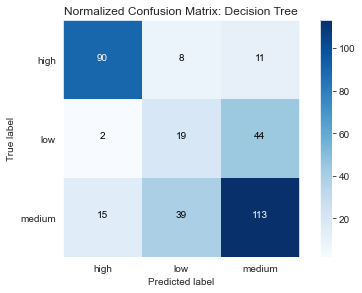

In [89]:
class_names = ['high', 'low', 'medium']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

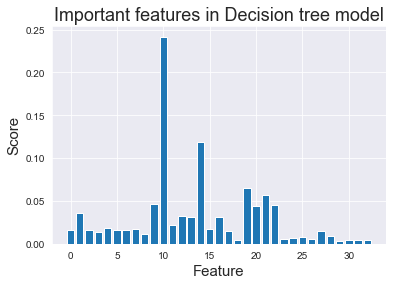

In [90]:
# plotting feature importances
importance = dtclf.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.xlabel('Feature', fontsize =15)
plt.ylabel('Score', fontsize =15)
plt.title('Important features in Decision tree model', fontsize =18)
plt.show()

plt.show()

In [92]:
for i,v in enumerate(importance):
    if v > 0.02:
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 1, Score: 0.03544
Feature: 9, Score: 0.04610
Feature: 10, Score: 0.24174
Feature: 11, Score: 0.02247
Feature: 12, Score: 0.03223
Feature: 13, Score: 0.03114
Feature: 14, Score: 0.11857
Feature: 16, Score: 0.03106
Feature: 19, Score: 0.06568
Feature: 20, Score: 0.04382
Feature: 21, Score: 0.05725
Feature: 22, Score: 0.04525


In [93]:
X.columns[[10,11,19,21]]

Index(['Standard', 'Touring', 'past_3_years_bike_related_purchases', 'age'], dtype='object')

# Demo +Trans (first three transactions)

## Split data into training, test, validation

In [97]:
df = PastCust_trans_cut_f3t_labeled_3.merge(PastCust_demo_labeled_3, 
                                   on = 'customer_id',
                                   how = 'inner')

In [98]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster_x',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation',
       'cluster_y'],
      dtype='object')

In [99]:
df.rename(columns = {'cluster_x':'cluster'}, inplace=True)
df.drop('cluster_y', axis=1, inplace=True)

In [100]:
df = df.drop(columns = ['customer_id'], axis=1)

In [101]:
X = df.drop(columns=['cluster']).copy()

In [102]:
X = pd.get_dummies(X) 

In [103]:
y = df['cluster']

In [104]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [105]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [106]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2726, 33), the shape of y_train is  (2726,)
the shape of X_valid is (341, 33), the shape of y_valid is  (341,)
the shape of X_test is (341, 33), the shape of y_test is  (341,)


## Fit model

In [107]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [108]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.36      0.35      0.36       113
         low       0.23      0.21      0.22        58
      medium       0.50      0.52      0.51       170

    accuracy                           0.41       341
   macro avg       0.36      0.36      0.36       341
weighted avg       0.41      0.41      0.41       341



Classification report: DT
-------------------------------
Matthews Coefficient: 0.03


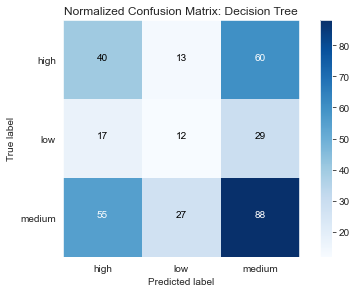

In [109]:
class_names = ['high', 'low', 'medium']

confusion_matrix(y_test,y_predict)

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [110]:
confusion_matrix(y_test,y_predict)

array([[40, 13, 60],
       [17, 12, 29],
       [55, 27, 88]])

# Demo + Trans (first three months)

## Split data into training, test, validaion

In [111]:
df = PastCust_trans_cut_f3m_labeled_3.merge(PastCust_demo_labeled_3, 
                                   on = 'customer_id',
                                   how = 'inner')

In [112]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster_x',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation',
       'cluster_y'],
      dtype='object')

In [113]:
df.rename(columns = {'cluster_x':'cluster'}, inplace=True)
df.drop('cluster_y', axis=1, inplace=True)

In [114]:
df = df.drop(columns = ['customer_id'], axis=1)

In [115]:
X = df.drop(columns=['cluster']).copy()

In [116]:
X = pd.get_dummies(X) 

In [117]:
y = df['cluster']

In [118]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [119]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [120]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2033, 33), the shape of y_train is  (2033,)
the shape of X_valid is (254, 33), the shape of y_valid is  (254,)
the shape of X_test is (255, 33), the shape of y_test is  (255,)


## Fit model

In [121]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [122]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.43      0.50      0.46        92
         low       0.17      0.19      0.18        42
      medium       0.53      0.45      0.49       121

    accuracy                           0.42       255
   macro avg       0.38      0.38      0.38       255
weighted avg       0.44      0.42      0.43       255



Classification report: DT
-------------------------------
Matthews Coefficient: 0.09


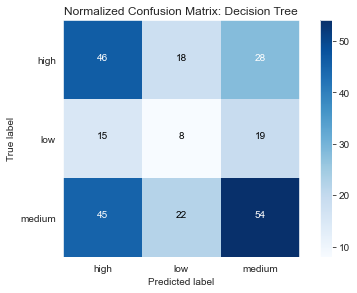

In [123]:
class_names = ['high', 'low', 'medium']

confusion_matrix(y_test,y_predict)

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [124]:
confusion_matrix(y_test,y_predict)

array([[46, 18, 28],
       [15,  8, 19],
       [45, 22, 54]])

# Model Comparison

| Model # | Data used | F-1 | Matthews_Coefficient |
| --- | --- | --- | --- |
| 1 | transaction data (2017 yr) | 0.62 | 0.38 |
| 2 | transaction data (first three transactions) | 0.39 | 0.02 |
| 3 | transaction data (first three months) | 0.39 | 0.03 |
| 4 | demographic data | 0.38 | 0.0 |
| 5 | demographic + transaction data (2017 yr) | 0.65 | 0.44 |
| 6 | demographic + transaction data (first three transactions) | 0.41 | 0.03 |
| 7 | demographic + transaction data (first three months) | 0.42 | 0.09 |